* Reference : 네이버 부스트코스 (파이썬으로 시작하는 데이터 사이언스)
    * 2.2 판다스 치트시트를 활용한 기초 익히기
    * [10minutes to pandas](https://pandas.pydata.org/pandas-docs/version/1.0.0/getting_started/10min.html)
        * 10minutes to pandas 자료를 보고 실습 진행한 내용 작성

## Pandas 
- 수식으로 계산할 수 있고 시각화도 할 수 있는 데이터 분석도구 <br>
- 엑셀로는 힘든 **대용량** 데이터를 판다스로 분석 가능함!! 

In [76]:
import numpy as np
import pandas as pd

### Object Creation
- Series 
    - 수학으로 표현할 때 : vector 
- DataFrame 
    - 수학으로 표현할 때 : 행렬 


In [77]:
s = pd.Series([1,3,5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [78]:
# Creating Data Frame by passing a NumPy array, datetime index and labeled columns:

dates = pd.date_range('20210918', periods=6)
dates

DatetimeIndex(['2021-09-18', '2021-09-19', '2021-09-20', '2021-09-21',
               '2021-09-22', '2021-09-23'],
              dtype='datetime64[ns]', freq='D')

In [162]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2021-09-18,0.693178,-0.300222,0.060708,0.475303
2021-09-19,-0.295647,-0.513414,0.980160,2.551286
2021-09-20,0.704010,-1.576266,0.100248,0.047730
2021-09-21,0.497849,-0.740197,-0.050779,1.890901
2021-09-22,-0.522007,0.350376,-0.299232,0.539580
2021-09-23,-1.632787,-0.575173,-1.132632,0.103156


In [80]:
# Creating DataFrame by passing a dict of objects 
df2 = pd.DataFrame({'A':1.,
                    'B': pd.Timestamp('20210918'),
                    'C': pd.Series(1, index=list(range(4)), dtype ='float'),
                    'D': np.array([3] * 4, dtype='int'),
                    'E': pd.Categorical(['test', 'train', 'test','train']),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2021-09-18,1.0,3,test,foo
1,1.0,2021-09-18,1.0,3,train,foo
2,1.0,2021-09-18,1.0,3,test,foo
3,1.0,2021-09-18,1.0,3,train,foo


In [81]:
# types of columns 

df2.dtypes

A           float64
B    datetime64[ns]
C           float64
D             int64
E          category
F            object
dtype: object

### Viewing data

In [82]:
# view top 
df.head(3)

,A,B,C,D
2021-09-18,1.088909,-1.229381,0.374420,-1.316252
2021-09-19,-0.024109,1.027087,-0.099453,-1.379512
2021-09-20,1.244303,-0.265986,0.226345,-1.295537


In [83]:
# view down 
df.tail(3)

,A,B,C,D
2021-09-21,-0.573535,0.171161,0.215918,1.660038
2021-09-22,0.171525,-0.474092,2.105032,-2.054451
2021-09-23,-0.955948,-0.676068,-1.739543,-0.613928


In [84]:
# index 
df.index

DatetimeIndex(['2021-09-18', '2021-09-19', '2021-09-20', '2021-09-21',
               '2021-09-22', '2021-09-23'],
              dtype='datetime64[ns]', freq='D')

In [85]:
# columns 
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [86]:
# gives a NumPy represntation of the underlying data 
# NumPy arrays have one dtype for all array 
# Pandas DataFrame have one dtype per column

df.to_numpy()

array([[ 1.08890889, -1.22938139,  0.37442039, -1.31625184],
       [-0.02410899,  1.02708694, -0.09945331, -1.37951237],
       [ 1.24430278, -0.26598605,  0.22634467, -1.29553739],
       [-0.57353517,  0.17116146,  0.21591828,  1.66003842],
       [ 0.17152474, -0.4740916 ,  2.10503182, -2.05445081],
       [-0.95594783, -0.67606782, -1.73954334, -0.61392751]])

In [87]:
df2.to_numpy()

array([[1.0, Timestamp('2021-09-18 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2021-09-18 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2021-09-18 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2021-09-18 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [88]:
# describe (statistic summary )
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.158524,-0.241213,0.180453,-0.833274
std,0.878181,0.774475,1.225539,1.303942
min,-0.955948,-1.229381,-1.739543,-2.054451
25%,-0.436179,-0.625574,-0.020610,-1.363697
50%,0.073708,-0.370039,0.221131,-1.305895
75%,0.859563,0.061875,0.337401,-0.784330
max,1.244303,1.027087,2.105032,1.660038


In [89]:
# Transposing 
df.T

,2021-09-18,2021-09-19,2021-09-20,2021-09-21,2021-09-22,2021-09-23
A,1.088909,-0.024109,1.244303,-0.573535,0.171525,-0.955948
B,-1.229381,1.027087,-0.265986,0.171161,-0.474092,-0.676068
C,0.374420,-0.099453,0.226345,0.215918,2.105032,-1.739543
D,-1.316252,-1.379512,-1.295537,1.660038,-2.054451,-0.613928


In [90]:
# Sorting by and axis 
# 열 기준으로 정렬하기, 역순으로 정렬하기 

df.sort_index(axis=1, ascending=False)

,D,C,B,A
2021-09-18,-1.316252,0.374420,-1.229381,1.088909
2021-09-19,-1.379512,-0.099453,1.027087,-0.024109
2021-09-20,-1.295537,0.226345,-0.265986,1.244303
2021-09-21,1.660038,0.215918,0.171161,-0.573535
2021-09-22,-2.054451,2.105032,-0.474092,0.171525
2021-09-23,-0.613928,-1.739543,-0.676068,-0.955948


In [91]:
# DataFrame 전체에서 'B'값을 기분으로 정렬하기 

df.sort_values(by='B')

,A,B,C,D
2021-09-18,1.088909,-1.229381,0.374420,-1.316252
2021-09-23,-0.955948,-0.676068,-1.739543,-0.613928
2021-09-22,0.171525,-0.474092,2.105032,-2.054451
2021-09-20,1.244303,-0.265986,0.226345,-1.295537
2021-09-21,-0.573535,0.171161,0.215918,1.660038
2021-09-19,-0.024109,1.027087,-0.099453,-1.379512


### Selection 

In [92]:
# Selecting a single column, which yields "Series"

df['A']

2021-09-18    1.088909
2021-09-19   -0.024109
2021-09-20    1.244303
2021-09-21   -0.573535
2021-09-22    0.171525
2021-09-23   -0.955948
Freq: D, Name: A, dtype: float64

In [93]:
# Slicing 
df[0:1]

,A,B,C,D
2021-09-18,1.088909,-1.229381,0.37442,-1.316252


In [94]:
# sliging via index 
df['20210918':'20210920']

,A,B,C,D
2021-09-18,1.088909,-1.229381,0.374420,-1.316252
2021-09-19,-0.024109,1.027087,-0.099453,-1.379512
2021-09-20,1.244303,-0.265986,0.226345,-1.295537


#### Subset(일부 값만 불러오기 )
* Selecting by label
    - `df.loc`
    - `df.at` 

In [163]:
# dates index 의 0번째 열 
df.loc[dates[0]]

A    0.693178
B   -0.300222
C    0.060708
D    0.475303
Name: 2021-09-18 00:00:00, dtype: float64

In [96]:
# A, B 열 전체 
df.loc[:, ['A','B']]

,A,B
2021-09-18,1.088909,-1.229381
2021-09-19,-0.024109,1.027087
2021-09-20,1.244303,-0.265986
2021-09-21,-0.573535,0.171161
2021-09-22,0.171525,-0.474092
2021-09-23,-0.955948,-0.676068


In [97]:
# endpoints are incldued 
# A, B 행에서 18~20까지 

df.loc['20210918':'20210920', ['A','B']]

,A,B
2021-09-18,1.088909,-1.229381
2021-09-19,-0.024109,1.027087
2021-09-20,1.244303,-0.265986


In [98]:
# Reduction in the dimensions the returned object 
# Series로 출력 
df.loc['20210918', ['A','B']]

A    1.088909
B   -1.229381
Name: 2021-09-18 00:00:00, dtype: float64

In [99]:
# Scalar value 
df.loc[dates[0], 'A']

1.0889088871691706

In [100]:
df.at[dates[0], 'A']

1.0889088871691706

* Selection by position 
    - 인덱스 번호 
    - `df.iloc[행, 열]`
    - `df.iat[행, 열]`

In [101]:
# index 3번 열 전체 
df.iloc[3]

A   -0.573535
B    0.171161
C    0.215918
D    1.660038
Name: 2021-09-21 00:00:00, dtype: float64

In [102]:
# df.iloc [행, 열]
df.iloc[3:5, 0:2]

,A,B
2021-09-21,-0.573535,0.171161
2021-09-22,0.171525,-0.474092


In [103]:
# lists of  integer position locations 
df.iloc[[1,2,4], [0,2]]

,A,C
2021-09-19,-0.024109,-0.099453
2021-09-20,1.244303,0.226345
2021-09-22,0.171525,2.105032


In [104]:
# Slicing rows explicityly 
df.iloc[1:3, :]

,A,B,C,D
2021-09-19,-0.024109,1.027087,-0.099453,-1.379512
2021-09-20,1.244303,-0.265986,0.226345,-1.295537


In [105]:
# Value 
df.iloc[1,1]

1.0270869357911772

In [106]:
df.iat[1,1]

1.0270869357911772

### Boolean indexing 

In [107]:
# single column's values 
df[df['A'] > 0]

,A,B,C,D
2021-09-18,1.088909,-1.229381,0.374420,-1.316252
2021-09-20,1.244303,-0.265986,0.226345,-1.295537
2021-09-22,0.171525,-0.474092,2.105032,-2.054451


In [108]:
# df 전체 중 해당되는 부분 표시
df[df > 0]

,A,B,C,D
2021-09-18,1.088909,NaN,0.374420,NaN
2021-09-19,NaN,1.027087,NaN,NaN
2021-09-20,1.244303,NaN,0.226345,NaN
2021-09-21,NaN,0.171161,0.215918,1.660038
2021-09-22,0.171525,NaN,2.105032,NaN
2021-09-23,NaN,NaN,NaN,NaN


In [109]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two','three', 'four', 'three']

# isin()for filtering 
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2021-09-20,1.244303,-0.265986,0.226345,-1.295537,two
2021-09-22,0.171525,-0.474092,2.105032,-2.054451,four


### Setting 

In [110]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20210918', periods=6))
s1

2021-09-18    1
2021-09-19    2
2021-09-20    3
2021-09-21    4
2021-09-22    5
2021-09-23    6
Freq: D, dtype: int64

In [111]:
# index 0의 A를  0으로 바꿔
df.at[dates[0], 'A'] = 0

In [112]:
# 0번째 index의 1번째 행은 0
df.iat[0, 1] = 0 

In [113]:
# D 열의 value 변경 
df.loc[:, 'D'] = np.array([5]* len(df))

In [114]:
df

,A,B,C,D
2021-09-18,0.000000,0.000000,0.374420,5
2021-09-19,-0.024109,1.027087,-0.099453,5
2021-09-20,1.244303,-0.265986,0.226345,5
2021-09-21,-0.573535,0.171161,0.215918,5
2021-09-22,0.171525,-0.474092,2.105032,5
2021-09-23,-0.955948,-0.676068,-1.739543,5


In [115]:
df2 =df.copy()

df2[df2 > 0] = -df2
df2

,A,B,C,D
2021-09-18,0.000000,0.000000,-0.374420,-5
2021-09-19,-0.024109,-1.027087,-0.099453,-5
2021-09-20,-1.244303,-0.265986,-0.226345,-5
2021-09-21,-0.573535,-0.171161,-0.215918,-5
2021-09-22,-0.171525,-0.474092,-2.105032,-5
2021-09-23,-0.955948,-0.676068,-1.739543,-5


### Missing data 
    - np.nan

In [116]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,E
2021-09-18,0.000000,0.000000,0.374420,5,1.0
2021-09-19,-0.024109,1.027087,-0.099453,5,1.0
2021-09-20,1.244303,-0.265986,0.226345,5,NaN
2021-09-21,-0.573535,0.171161,0.215918,5,NaN


In [117]:
# drop missing data 

df1.dropna(how='any')

,A,B,C,D,E
2021-09-18,0.000000,0.000000,0.374420,5,1.0
2021-09-19,-0.024109,1.027087,-0.099453,5,1.0


In [118]:
# Filling missing data 
df1.fillna(value=5)

,A,B,C,D,E
2021-09-18,0.000000,0.000000,0.374420,5,1.0
2021-09-19,-0.024109,1.027087,-0.099453,5,1.0
2021-09-20,1.244303,-0.265986,0.226345,5,5.0
2021-09-21,-0.573535,0.171161,0.215918,5,5.0


In [119]:
# boolean mask where values are nan

pd.isna(df1)

,A,B,C,D,E
2021-09-18,False,False,False,False,False
2021-09-19,False,False,False,False,False
2021-09-20,False,False,False,False,True
2021-09-21,False,False,False,False,True


### Operations 

#### Stats

In [120]:
# 각 열의 평균 
df.mean()

A   -0.022961
B   -0.036316
C    0.180453
D    5.000000
dtype: float64

In [121]:
# 각 행의 평균 
df.mean(1)

2021-09-18    1.343605
2021-09-19    1.475881
2021-09-20    1.551165
2021-09-21    1.203386
2021-09-22    1.700616
2021-09-23    0.407110
Freq: D, dtype: float64

In [122]:
# broadcasts along the specified dimension 
s = pd.Series([1,3,5, np.nan ,6, 8], index=dates).shift(2)

s

2021-09-18    NaN
2021-09-19    NaN
2021-09-20    1.0
2021-09-21    3.0
2021-09-22    5.0
2021-09-23    NaN
Freq: D, dtype: float64

In [123]:
df.sub(s, axis='index')

,A,B,C,D
2021-09-18,NaN,NaN,NaN,NaN
2021-09-19,NaN,NaN,NaN,NaN
2021-09-20,0.244303,-1.265986,-0.773655,4.0
2021-09-21,-3.573535,-2.828839,-2.784082,2.0
2021-09-22,-4.828475,-5.474092,-2.894968,0.0
2021-09-23,NaN,NaN,NaN,NaN


### Apply 


In [124]:
df.apply(np.cumsum)

,A,B,C,D
2021-09-18,0.000000,0.000000,0.374420,5
2021-09-19,-0.024109,1.027087,0.274967,10
2021-09-20,1.220194,0.761101,0.501312,15
2021-09-21,0.646659,0.932262,0.717230,20
2021-09-22,0.818183,0.458171,2.822262,25
2021-09-23,-0.137764,-0.217897,1.082719,30


In [125]:
df.apply(lambda x : x.max() - x.min())

A    2.200251
B    1.703155
C    3.844575
D    0.000000
dtype: float64

### Histogramming 

In [126]:
s = pd.Series(np.random.randint(0,7, size=10))
s

0    0
1    6
2    3
3    6
4    6
5    2
6    1
7    0
8    1
9    6
dtype: int64

In [127]:
s.value_counts()

6    4
0    2
1    2
3    1
2    1
dtype: int64

### String Methods 

In [128]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge 

* Concat()

In [130]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-1.597673,-1.775433,0.431239,-1.135763
1,-0.003139,0.550342,0.944105,-0.481623
2,0.329930,1.792492,0.163677,0.959189
3,0.639957,1.848704,0.603955,-0.045124
4,-1.043078,0.452447,-0.517773,0.825306
5,-0.984114,-1.123832,0.662255,0.623502
6,-0.871585,1.544123,-1.407617,-0.236832
7,0.361778,-1.008846,0.627504,-0.008187
8,-0.757810,1.464830,1.521469,-1.676825
9,-0.425591,-0.079211,-1.132706,-0.016686


In [133]:
# break it into pieceis 
piecies = [df[:3], df[3:7], df[7:]]

# merge 
pd.concat(piecies)

,0,1,2,3
0,-1.597673,-1.775433,0.431239,-1.135763
1,-0.003139,0.550342,0.944105,-0.481623
2,0.329930,1.792492,0.163677,0.959189
3,0.639957,1.848704,0.603955,-0.045124
4,-1.043078,0.452447,-0.517773,0.825306
5,-0.984114,-1.123832,0.662255,0.623502
6,-0.871585,1.544123,-1.407617,-0.236832
7,0.361778,-1.008846,0.627504,-0.008187
8,-0.757810,1.464830,1.521469,-1.676825
9,-0.425591,-0.079211,-1.132706,-0.016686


- Join()

In [141]:
left = pd.DataFrame({'key': ['foo','bar'], 'lval': [1,2]})
right = pd.DataFrame({'key': ['foo','bar'], 'rval':[4,5]})

left

,key,lval
0,foo,1
1,bar,2


In [142]:
right

,key,rval
0,foo,4
1,bar,5


In [143]:
# key를 기준으로 합쳐라! 
pd.merge(left,right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Grouping (Group By)
- Splitting 
- Applying
- Combining

In [165]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                        'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-0.349227,0.504136
1,bar,one,0.497834,-0.057246
2,foo,two,0.987120,-0.162820
3,bar,three,-1.287884,0.601130
4,foo,two,-0.169201,1.110899
5,bar,two,-0.764899,0.140529
6,foo,one,0.309029,0.215517
7,foo,three,-1.222149,0.812264


In [145]:
df.groupby('A').sum()

,C,D
A,,
bar,0.721212,-0.337193
foo,-0.102085,-0.600410


In [166]:
# A 컬럼 값을 Groupby 해서 C컬럼 값 평균값 구하기 
df.groupby(['A'])['C'].mean()

A
bar   -0.518317
foo   -0.088886
Name: C, dtype: float64

In [146]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.893341 -1.225178
    three  1.246184  0.284286
    two    0.368368  0.603699
foo one   -0.370969  1.642278
    three  1.124183  1.452824
    two   -0.855298 -3.695512

### Pivot tables

In [147]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.172634,0.469426
1,one,B,foo,-1.367568,-0.010318
2,two,C,foo,-0.550218,0.150254
3,three,A,bar,-1.040656,0.683917
4,one,B,bar,-0.034403,1.352440
5,one,C,bar,0.832286,-0.284217
6,two,A,foo,1.279530,0.511236
7,three,B,foo,0.636210,-0.457762
8,one,C,foo,-0.392618,-0.586972
9,one,A,bar,-0.767404,0.854537


In [148]:
# aggfunction 은 mean 
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.767404  0.172634
      B -0.034403 -1.367568
      C  0.832286 -0.392618
three A -1.040656       NaN
      B       NaN  0.636210
      C  1.990906       NaN
two   A       NaN  1.279530
      B  0.230656       NaN
      C       NaN -0.550218

In [154]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'], aggfunc = sum)

C             bar       foo
A     B                    
one   A -0.767404  0.172634
      B -0.034403 -1.367568
      C  0.832286 -0.392618
three A -1.040656       NaN
      B       NaN  0.636210
      C  1.990906       NaN
two   A       NaN  1.279530
      B  0.230656       NaN
      C       NaN -0.550218

### Plotting 


In [155]:
import matplotlib.pyplot as plt 
plt.close('all')

<AxesSubplot:>

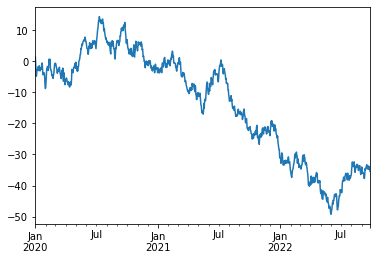

In [156]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2020', periods=1000))

ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

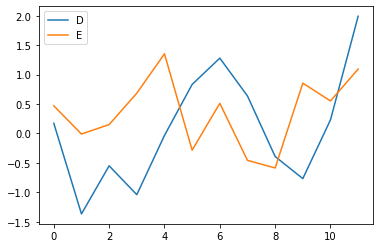

In [157]:
# 꺾은선 그래프 그리기 
df.plot()

<AxesSubplot:>

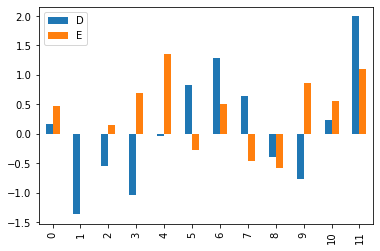

In [158]:
# 막대그래프 그리기 
df.plot.bar()

<AxesSubplot:ylabel='Density'>

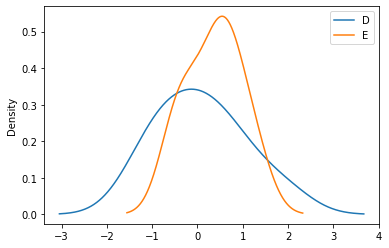

In [159]:
# 밀도함수 그리기 
df.plot.density()